In [1]:
import wandb
import numpy as np
import pandas as pd
from collections import defaultdict

In [73]:
api = wandb.Api()
runs = api.runs("kilian/lift")

# Teacher Prior influence

In [3]:
# Filter runs by the "beta_sweep" tag
beta_sweep_runs = [run for run in runs if "beta_sweep_2" in run.tags and run.state == "finished"]

# Output the filtered runs
print(f"Found {len(beta_sweep_runs)} runs with the tag 'beta_sweep'.")

Found 60 runs with the tag 'beta_sweep'.


In [4]:
rwd_data = defaultdict(list)
mae_data = defaultdict(list)

for run in beta_sweep_runs:
    run_id = run.id
    history = run.history(samples=10000)
    beta = run.config["encoder"]["beta_2"]
    rwd_data[beta].append(history.encoder_reward.values[-1])
    mae_data[beta].append(history.encoder_mae.values[-1])

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


betas = list(rwd_data.keys())
rwd_mean = [np.mean(val) for val in rwd_data.values()]
rwd_std = [np.std(val) for val in rwd_data.values()]
data = pd.DataFrame({
    'Scaling Factor': betas,
    'Mean Reward': rwd_mean,
    'Standard Deviation': rwd_std,
})

In [12]:
mae_mean = [np.mean(val) for val in mae_data.values()]
mae_std = [np.std(val) for val in mae_data.values()]
mae_data = pd.DataFrame({
    'Scaling Factor': betas,
    'Standard Deviation': mae_std,
    'MAE': mae_mean,
})

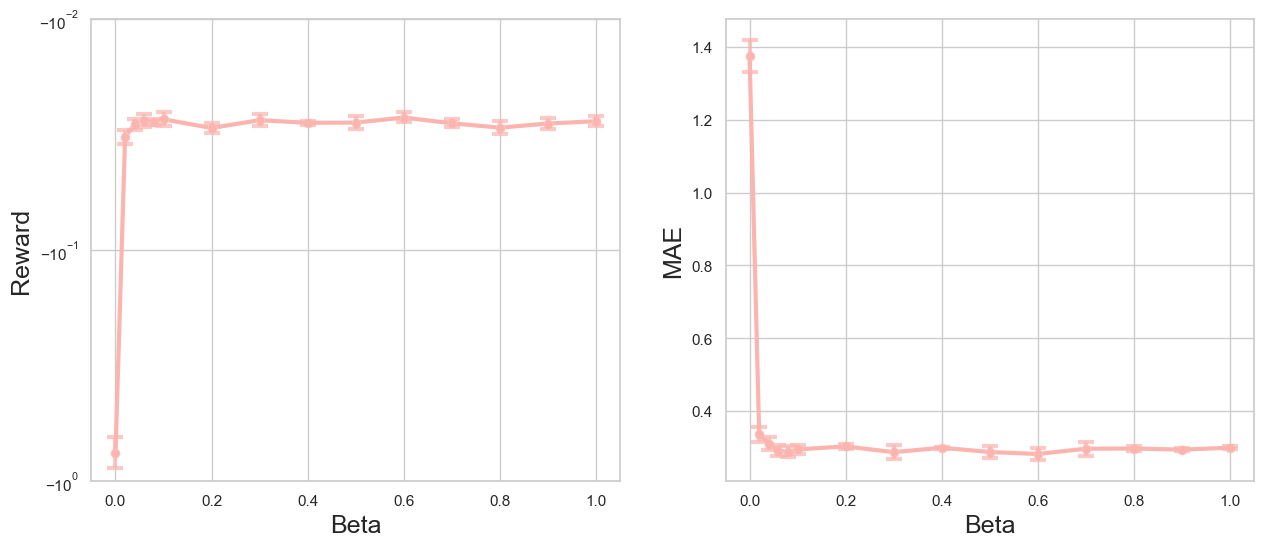

In [36]:
cmap = plt.get_cmap('Pastel1')
# set fontsize
plt.rc('font', size=16)

# plt.figure(figsize=(10, 6))
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.set(style="whitegrid")

sns.lineplot(x='Scaling Factor', y='Mean Reward', data=data, marker='o', errorbar=None, color=cmap(0), linewidth=3, ax=axs[0])
axs[0].errorbar(data['Scaling Factor'], data['Mean Reward'], yerr=data['Standard Deviation'], fmt='o', ecolor=cmap(0), elinewidth=3, capthick=3, capsize=6, alpha=0.7, color=cmap(0))

axs[0].set_yscale('symlog', linthresh=0.01)
axs[0].set_ylim(-1., -0.01)


sns.lineplot(x='Scaling Factor', y='MAE', data=mae_data, marker='o', errorbar=None, color=cmap(0), linewidth=3, ax=axs[1])
axs[1].errorbar(mae_data['Scaling Factor'], mae_data['MAE'], yerr=mae_data['Standard Deviation'], fmt='o', ecolor=cmap(0), elinewidth=3, capthick=3, capsize=6, alpha=0.7, color=cmap(0))
# axs[1].set_yscale('log')
# axs[1].set_ylim(0.15, 1.5)

axs[0].set_xlabel('Beta', fontsize=18)
axs[1].set_xlabel('Beta', fontsize=18)
axs[0].set_ylabel('Reward', fontsize=18)
axs[1].set_ylabel('MAE', fontsize=18)
plt.savefig('../figures/teacher_beta.png', dpi=400)
plt.show()

# MI Iter

In [74]:
# Filter runs by the "beta_sweep" tag
beta_sweep_runs = [run for run in runs if "mi_sweep_2" in run.tags and run.state == "finished"]

# Output the filtered runs
print(f"Found {len(beta_sweep_runs)} runs with the tag 'mi_sweep'.")

Found 50 runs with the tag 'mi_sweep'.


In [75]:
run_data = defaultdict(list)

for run in beta_sweep_runs:
    run_id = run.id
    history = run.history(samples=10000)
    run_results = {
        "noise": run.config["noise_range"][-1],
        "noise_slope": run.config["noise_slope_range"][-1],
        "alpha": run.config["alpha_range"][-1],
        "mean_rewards": np.nanmean(history.encoder_reward.values[1:]),
        "last_rewards": np.nanmean(history.encoder_reward.values[-3:]),
        "mean_mae": np.nanmean(history.encoder_mae.values[1:]),
        "last_mae": np.nanmean(history.encoder_mae.values[-3:]),
    }
    for key, value in run_results.items():
        run_data[key].append(value)

df = pd.DataFrame(run_data)

In [76]:
# TODO plot baseline

In [77]:
df.head()

,noise,noise_slope,alpha,mean_rewards,last_rewards,mean_mae,last_mae
0,1.0,1.00000,3,-0.122948,-0.056367,0.602839,0.547758
1,1.0,0.75025,3,-0.072618,-0.107116,0.531803,0.688576
2,1.0,0.50050,3,-0.076043,-0.047585,0.487150,0.507276
3,1.0,0.25075,3,-0.099175,-0.175065,0.519752,0.597910
4,1.0,0.00100,3,-0.131321,-0.225068,0.548095,0.650913


Text(0.5, 0.98, 'Alpha = 1.0')

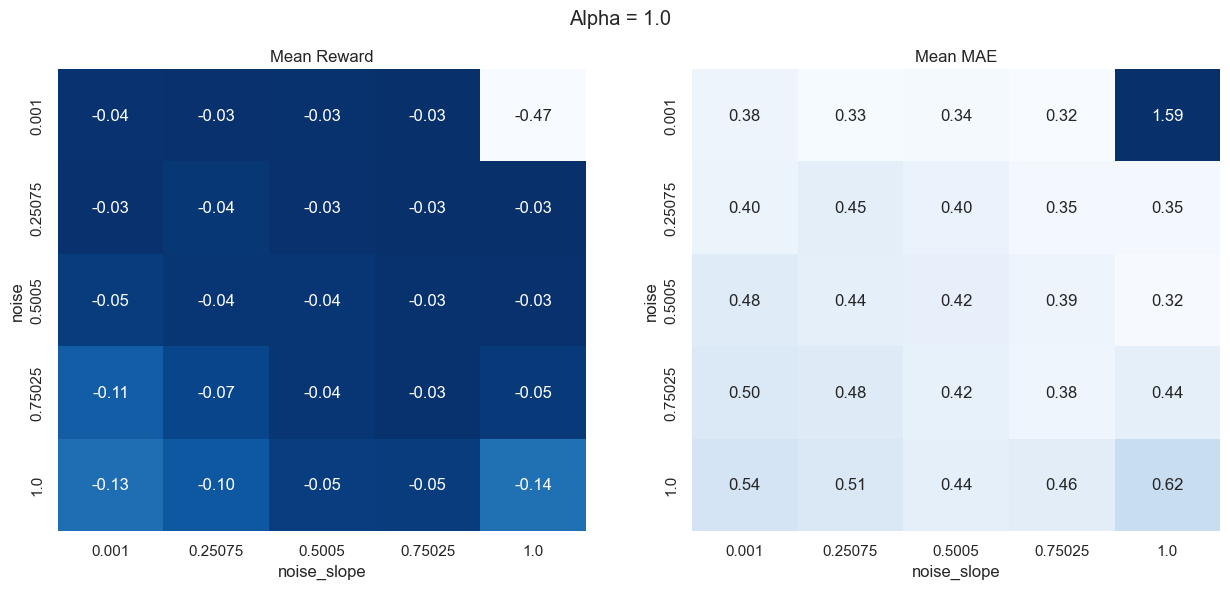

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

df_a1 = df[df['alpha'] == 1.0]

sns.heatmap(df_a1.pivot(index='noise', columns='noise_slope', values='mean_rewards'), annot=True, cbar=False, fmt=".2f", cmap="Blues", ax=axs[0])
sns.heatmap(df_a1.pivot(index='noise', columns='noise_slope', values='mean_mae'), annot=True, cbar=False, fmt=".2f", cmap="Blues", ax=axs[1])

axs[0].set_title("Mean Reward")
axs[1].set_title("Mean MAE")
fig.suptitle("Alpha = 1.0")

Text(0.5, 0.98, 'Alpha = 3.0')

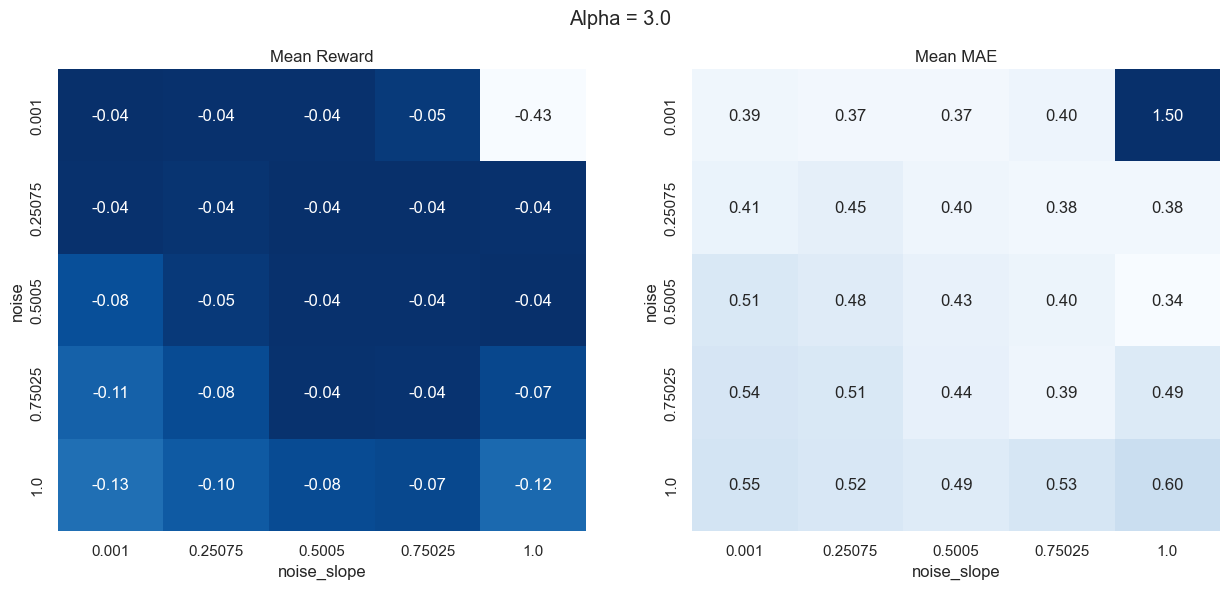

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

df_a3 = df[df['alpha'] == 3.0]

sns.heatmap(df_a3.pivot(index='noise', columns='noise_slope', values='mean_rewards'), annot=True, cbar=False, fmt=".2f", cmap="Blues", ax=axs[0])
sns.heatmap(df_a3.pivot(index='noise', columns='noise_slope', values='mean_mae'), annot=True, cbar=False, fmt=".2f", cmap="Blues", ax=axs[1])

axs[0].set_title("Mean Reward")
axs[1].set_title("Mean MAE")
fig.suptitle("Alpha = 3.0")